<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB4-05%20Biomedical%20Imaging%20and%20Tensorflow_(III).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Imaging and Tensorflow III:
# Create a Dataset from Files


## 1. Introduction

[`Malaria`](https://es.wikipedia.org/wiki/Malaria)_` is a life-threatening disease caused by parasites of the `*`Plasmodium genus`*_, which are transmitted to humans through the bites of infected _`female `*`Anopheles`*` mosquitoes`_. There are several species of *Plasmodium* that cause malaria in humans, with *Plasmodium falciparum* being the most deadly. _`Symptoms`_ of malaria typically include _`fever, chills, headache, nausea, and muscle pain`_. If not treated promptly, malaria can lead to severe complications and death, particularly with *P. falciparum* infections.



### Detection of Malaria

Traditionally, _**`malaria is detected through`**_:

1. **`Rapid Diagnostic Tests (RDTs)`**: These tests _`detect specific antigens`_ produced by *Plasmodium* parasites. RDTs are quicker than microscopy and do not require specialized equipment, making them useful in remote areas.

2. **`Smear Microscopic Examination`**: A smear is a scientific technique used in medicine and biology to examine samples of body fluids, such as blood or urine, under a microscope. _`Blood smears are stained`_ often  stained with Giemsa or Wright-Giemsa stain and examined under a microscope to identify the _`presence of `*`Plasmodium`*` parasites`_. This method requires skilled technicians and can be time-consuming.

3. **`Polymerase Chain Reaction (PCR)`**: This _`molecular method detects `*`Plasmodium`*` DNA in a patient's blood`_. PCR is highly sensitive and specific but is more complex and expensive, typically used in research or for confirming diagnoses.



### Deep Learning in Malaria Detection

Deep learning, a subset of machine learning involving neural networks with many layers, has been increasingly applied to medical imaging, including malaria detection. _`Deep learning can be used to`_:

1. **`Automated Microscopy Analysis`**:
  - _`Deep learning models, particularly convolutional neural networks (CNNs)`_, can be trained to analyze blood smear images and _`identify `*`Plasmodium`*` parasites`_. These models can assist or even outperform human technicians in detecting malaria, especially in low-resource settings.

2. **``How is Trained a Deep Learning Model for Microscopy Analysis?``**:
  - **``Dataset``**: _`Large datasets of labeled blood smear images`_ are needed to train the deep learning model. The _`images must be annotated with the presence or absence of malaria parasites`_, and sometimes specific stages of the parasites (e.g., rings, trophozoites).
  - **``Model Architecture``**: _`CNNs`_ are typically used due to their effectiveness in image recognition tasks. _`Layers in the CNN will learn to identify features associated with malaria parasites (e.g., shape, color, texture)`_.
  - **``Training Process``**: The model is trained using a _`supervised learning approach, where it learns to minimize the difference between its predictions and the actual labels`_. Techniques like data augmentation, transfer learning, and hyperparameter tuning can improve performance.

3. **``Validation and Testing``**:
  - After training, _`the model's accuracy, sensitivity, specificity, and other metrics are evaluated on a separate test set for validation`_ to ensure it performs well in real-world scenarios.

4. **`Deployment`**:
  - _`Once validated, the model can be deployed in clinical settings to assist in the rapid and accurate diagnosis of malaria`_. This is especially valuable in areas where skilled microscopists are scarce.



###Deep Learning for Malaria Detection

- **`Speed and Efficiency`**: Automated systems _``can analyze thousands of images quickly``_, reducing the time needed for diagnosis.
- **`Accuracy`**: Deep learning models can achieve _``high accuracy, potentially reducing false negatives and positives``_ compared to traditional methods.
- **`Accessibility`**: In regions with limited access to expert healthcare providers, _``deep learning tools can provide reliable diagnostic support``_.





In summary, deep learning offers a promising approach to improving malaria detection, potentially transforming how this disease is diagnosed and managed, particularly in endemic regions.

## 2. Download the Malaria Dataset



### Download the Dataset


---
**Download `cell_images.zip` file from a provided URL**

---


_To use a manually downloaded dataset with TensorFlow Datasets (TFDS), `the dataset structure and metadata must be properly set up to be recognized by TFDS`_. Unfortunately, _``TFDS expects a certain structure``_ (which will be study later in this NB) for its datasets, which can be challenging when using manually downloaded files.

In [1]:
import tensorflow as tf
import pathlib
import os

dataset_url = 'https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip'

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='cell_images.zip', extract=False)
data_dir = pathlib.Path(data_dir)

353452851/353452851 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Extract the Dataset

---
**Unzip the downloaded file.**

---

We need to convert a path to a `pathlib.Path` object, ensure a specific directory exists, extract the contents of a zip file into that directory, and then verify the extraction by printing a message.

The `pathlib` module in Python provides a more intuitive and object-oriented way to handle file and directory paths compared to the traditional `os` module. A `pathlib.Path` is a class from the `pathlib` module that represents a file or directory path in the file system.


This can be done with `os` like this:

```python
import os
import zipfile

# Convert to a string path (if not already a string)
data_dir = str(data_dir)

# Define the malaria dataset directory path
malaria_dir = '/content/datasets/malaria'

# Ensure the malaria directory exists
os.makedirs(malaria_dir, exist_ok=True)

# Extract the zip file into the manual directory
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(malaria_dir)

# Verify the extraction
print(f'Extracted files to {malaria_dir}')
```

y with `pathlib` in this way:

In [2]:
import pathlib
import zipfile


# Convert to a pathlib Path object
data_dir = pathlib.Path(data_dir)

# Define the malaria dataset directory path
malaria_dir = pathlib.Path('/content/datasets/malaria')

# Ensure the malaria directory exists
malaria_dir.mkdir(parents=True, exist_ok=True)

# Extract the zip file into the manual directory
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(malaria_dir)

# Verify the extraction
print(f'Extracted files to {malaria_dir}')

Extracted files to /content/datasets/malaria


We can do both (download and extrat the zip file in malaria) at the same time using the commands with !:

```python
import os
import tensorflow as tf

HOME = os.getcwd() # Obtain actual directory
datasets_dir = os.path.join(HOME, "datasets")
malaria_dir = os.path.join(datasets_dir, "malaria")
os.makedirs(malaria_dir, exist_ok=True)

# Change to new dataset folder
os.chdir(malaria_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('cell_images.zip'):
  !wget -q https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip -O cell_images.zip
!unzip -qq -o cell_images.zip
```

### Inspect the Dataset



---
**Display the datapath structure.**

---


The `dataset contains several thousand photos of cell images in two subdirectories (classes)` with one cell image per class. The directory structure is as follows thanks to this snipet:


**A**. with `os`

In [3]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Print the directory tree
print_directory_tree(data_dir)


cell_images
    |-- Uninfected
    |-- Parasitized


**B**. Or with `pathlib`.

In [4]:
from pathlib import Path

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + root_dir.name)

    if root_dir.is_dir():
        for item in root_dir.iterdir():
            if item.is_dir():
                print_directory_tree(item, level + 1)

# Define the data directory
data_dir = Path('/content/datasets/malaria/cell_images')

# Print the directory tree
print_directory_tree(data_dir)


cell_images
    |-- Uninfected
    |-- Parasitized


**C**. Or with command `tree`

In [5]:
# Install Pip Tree globally

!sudo apt install tree -q

!tree --dirsfirst -L 1  datasets/malaria/cell_images

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (335 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123629 files and directories currently installed.)
Preparing 

---
**Visualize an image from each directory**

---

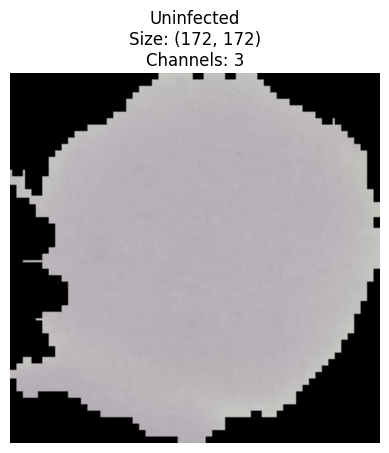

Uninfected Image: C206ThinF_IMG_20151029_140511_cell_155.png
Size: (172, 172)
Channels: 3


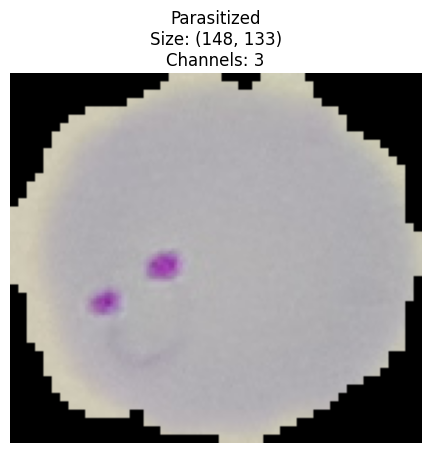

Parasitized Image: C180P141NThinF_IMG_20151201_165601_cell_168.png
Size: (148, 133)
Channels: 3


In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Get an image from each category
uninfected_image_dir = os.path.join(data_dir, 'Uninfected')
parasitized_image_dir = os.path.join(data_dir, 'Parasitized')

# List files in each directory
uninfected_images = [f for f in os.listdir(uninfected_image_dir) if f.endswith('.png')]
parasitized_images = [f for f in os.listdir(parasitized_image_dir) if f.endswith('.png')]

# Get the first image from each category
uninfected_image_path = os.path.join(uninfected_image_dir, uninfected_images[0])
parasitized_image_path = os.path.join(parasitized_image_dir, parasitized_images[0])

# Open and display the Uninfected image
uninfected_image = Image.open(uninfected_image_path)
plt.imshow(uninfected_image)
plt.axis('off')
plt.title(f'Uninfected\nSize: {uninfected_image.size}\nChannels: {len(uninfected_image.getbands())}')
plt.show()

# Print Uninfected image details
print(f'Uninfected Image: {os.path.basename(uninfected_image_path)}')
print(f'Size: {uninfected_image.size}')
print(f'Channels: {len(uninfected_image.getbands())}')

# Open and display the Parasitized image
parasitized_image = Image.open(parasitized_image_path)
plt.imshow(parasitized_image)
plt.axis('off')
plt.title(f'Parasitized\nSize: {parasitized_image.size}\nChannels: {len(parasitized_image.getbands())}')
plt.show()

# Print Parasitized image details
print(f'Parasitized Image: {os.path.basename(parasitized_image_path)}')
print(f'Size: {parasitized_image.size}')
print(f'Channels: {len(parasitized_image.getbands())}')


`An important detail is that each image has a different size`.

---
**Display some images from both classes**

---

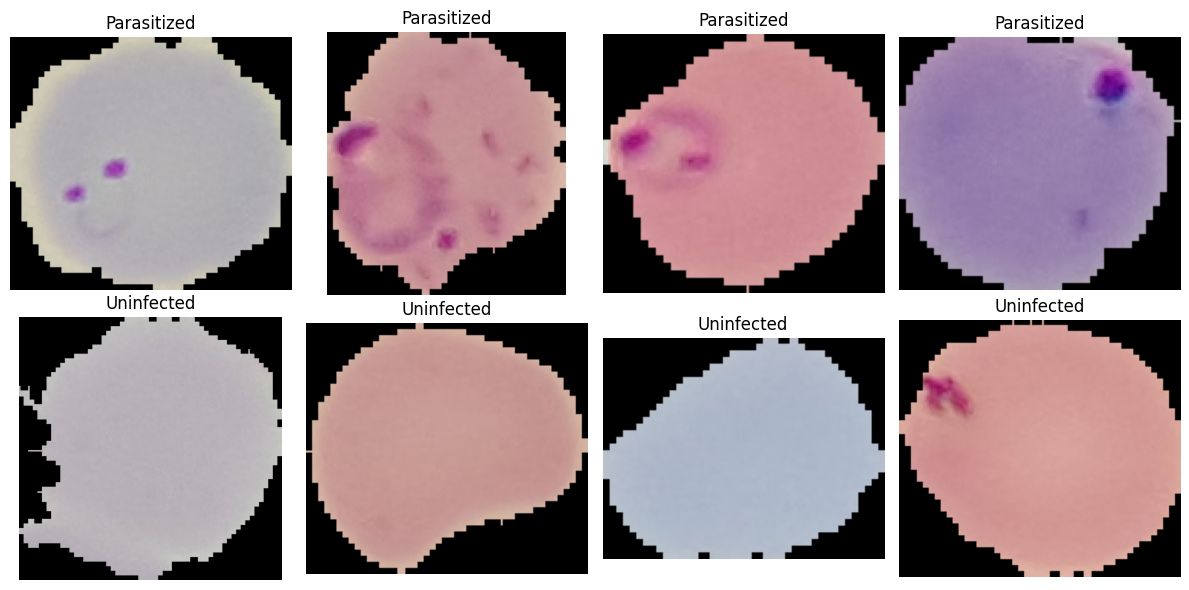

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Define the number of images to display from each class
num_images_per_class = 4

# Define the paths to the image directories
parasitized_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')

# Get the list of images in each directory
parasitized_images = os.listdir(parasitized_dir)[:num_images_per_class]
uninfected_images = os.listdir(uninfected_dir)[:num_images_per_class]

# Display Parasitized images
plt.figure(figsize=(12, 6))
for i, image_name in enumerate(parasitized_images):
    img_path = os.path.join(parasitized_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Parasitized')

# Display Uninfected images
for i, image_name in enumerate(uninfected_images):
    img_path = os.path.join(uninfected_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+5)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Uninfected')
plt.tight_layout()
plt.show()


`Efectively, notice that images are not of the same size!`

---
**Count number of images in both classes**

---

In [8]:
import os

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Count the number of images in each subdirectory
parasitized_count = len(os.listdir(os.path.join(data_dir, 'Parasitized')))
uninfected_count = len(os.listdir(os.path.join(data_dir, 'Uninfected')))

# Print the counts
print(f'Parasitized: {parasitized_count} images')
print(f'Uninfected: {uninfected_count} images')


Parasitized: 13780 images
Uninfected: 13780 images


### Load the Dataset



Using Keras `image_dataset_from_directory` you can create train and validation sets from a directory. The `tf.keras.preprocessing.image_dataset_from_directory` utility offers incredible convenience for loading and parsing images off disk!


The `tf.keras.preprocessing.image_dataset_from_directory` function in TensorFlow _`expects a specific directory structure to correctly load an image dataset from a directory`_. This structure follows a convention where images are organized into subdirectories based on their labels or classes.



#### Directory Structure

The directory structure should be as follows:

```
dataset_directory/
    class_a/
        img1.jpg
        img2.jpg
        ...
    class_b/
        img1.jpg
        img2.jpg
        ...
    ...
```



#### Using `image_dataset_from_directory`

Here's an example of how to use the `image_dataset_from_directory` function to load this dataset:

```python
import tensorflow as tf

# Path to the main dataset directory
dataset_directory = "path/to/dataset"

# Create the image dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,       # Split the dataset into training and validation
    subset="training",          # Specify that this is the training subset
    seed=123,                   # Seed for randomization
    image_size=(256, 256),      # Size to resize images to
    batch_size=32               # Batch size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,       # Split the dataset into training and validation
    subset="validation",        # Specify that this is the validation subset
    seed=123,                   # Seed for randomization
    image_size=(256, 256),      # Size to resize images to
    batch_size=32               # Batch size
)
```



#### Important Parameters of `image_dataset_from_directory`

- `directory`: Path to the main dataset directory.
- `validation_split`: Fraction of the dataset to reserve for validation.
- `subset`: Specifies whether the subset is training (`"training"`) or validation (`"validation"`).
- `seed`: Seed for randomization to ensure consistent training and validation splits.
- `image_size`: A tuple specifying the size to resize all images to.
- `batch_size`: Size of the batches of data.



#### Additional Notes

- `Images should be in a format supported by TensorFlow (such as JPEG or PNG)`.
- `The names of the subdirectories will be used as class labels`.
- `The function can also handle automatic splitting of training and validation datasets if the validation_split parameter is specified`.

By following this structure and using the `image_dataset_from_directory` function correctly, you can load and prepare your image dataset for use in deep learning models with TensorFlow.


We set batch size initially to 32 because it tends to be a good size for many of the datasets with which we work. We set image height and width at 64 because we get good results and the model trains really fast. **`At the end of this notebook, feel free to experiment with these parameters`.**

>**NOTE:** *Our inspection revealed that image size differs. Since TensorFlow models expect images of the same size, we must resize them.*



## 3. Create Training and Test/Val Sets
The `tf.keras.preprocessing.image_dataset_from_directory` utility generates a `tf.data` Dataset from image files in a directory. The utility is very useful because it allows us to conveniently split, seed, resize, and batch data. Let’s split data into 80% training and 20% test sets. Theoretically we must set this split based on numerous experiments. Of course, you can tweak
the sizes with your own experiment. The combination of the `validation_split` and `subset` parameters determines the train and test(val) splits.





---
**Create Training and Test Sets**

---

In [17]:
import tensorflow as tf
import pathlib

# Define the data directory
data_dir = pathlib.Path('/content/datasets/malaria/cell_images')

# Load the dataset using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Split 80% for training and 20% for validation
    subset="training",
    seed=123,
    image_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

test_ds = val_ds

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


---
**Obtain information about the datasets (train_ds)**

---

In [10]:
class_names = train_ds.class_names
print(f'Class names: {class_names}')

num_batches = len(train_ds)
print(f'Number of batches: {num_batches}')

for images, labels in train_ds.take(1):
    print(f'Batch shape: {images.shape}')
    print(f'Labels shape: {labels.shape}')

    image_shape = images.shape[1:]
    print(f'Image size: {image_shape[:2]}')
    print(f'Number of channels: {image_shape[2]}')

    print(f'Example label[0]: {labels[0].numpy()}')

    # Convert to numpy array for easier inspection
    images_array = images.numpy()

    # Print the range of pixel values for the first image in the batch
    print(f'Min pixel value: {images_array[0].min()}')
    print(f'Max pixel value: {images_array[0].max()}')



Class names: ['Parasitized', 'Uninfected']
Number of batches: 689
Batch shape: (32, 64, 64, 3)
Labels shape: (32,)
Image size: (64, 64)
Number of channels: 3
Example label[0]: 0
Min pixel value: 0.0
Max pixel value: 234.41796875


Min pixel value is a float value 0.0 but Max pixel value is not 1.0, it is 226.84... _`It is not normalized yet.!!`_

###  Display Images and Labels from some Batch



---
**Show a batch of images and labels**

---

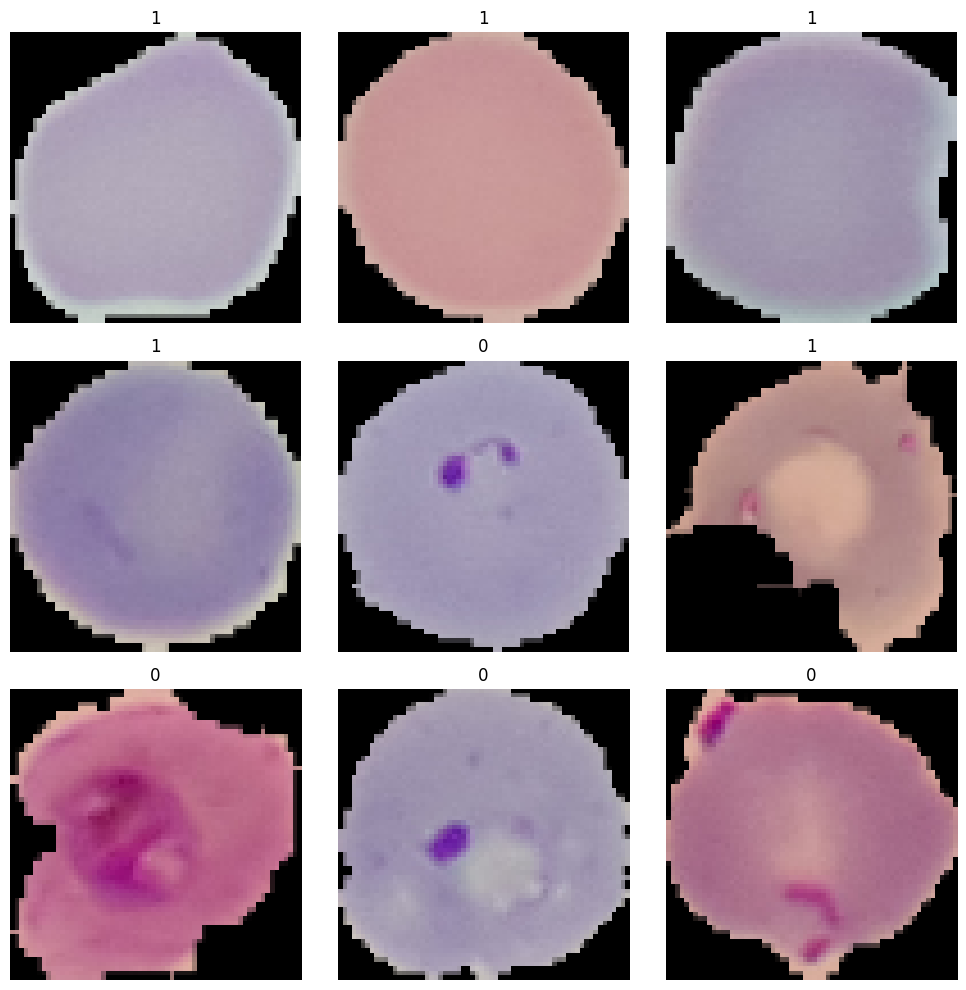

In [11]:
# Show a batch of images and labels
import matplotlib.pyplot as plt

# train_ds is divided into batches. If I use take(1),
# it is like taking a whole batch (32 images) but we taken only 9 from it
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

plt.tight_layout()
plt.show()

### Parse Data

---
***Inspect* Tensors**

---

In [12]:
train_ds, val_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

Take the first batch from the training set and preserve shapes:

---
**Inspect the first batch shape**

---

Each batch is composed from 32 images with a size of 64x64 and three channels (RGB)

We take the first batch to help us inspect a batch from the dataset. We preserve the shape of the batch and batch size for use in the model. Batch size is 32, and images are resized to 64 × 64 × 3. The 3 value indicates that images have three channels, which means they are RGB (color). Labels have shape (32,) that corresponds to the 32 batch size of labels.


In [13]:
for img, lbl in train_ds.take(1):
  print (img.shape, lbl.shape)

# save cell_shape and just_image
cell_shape, just_img = img.shape[1:],img.shape[1:3]
print(f'cell_shape: {cell_shape}')
print(f'just_img: {just_img}')


(32, 64, 64, 3) (32,)
cell_shape: (64, 64, 3)
just_img: (64, 64)



---
**Get classes names**

---

We already identified the classes from the branches names from directory tree. But we can now access them with the `class_names` method:


In [14]:
# Check the class names
class_names = train_ds.class_names
print(class_names)


['Parasitized', 'Uninfected']


___
**Display images from a batch in memory**

___



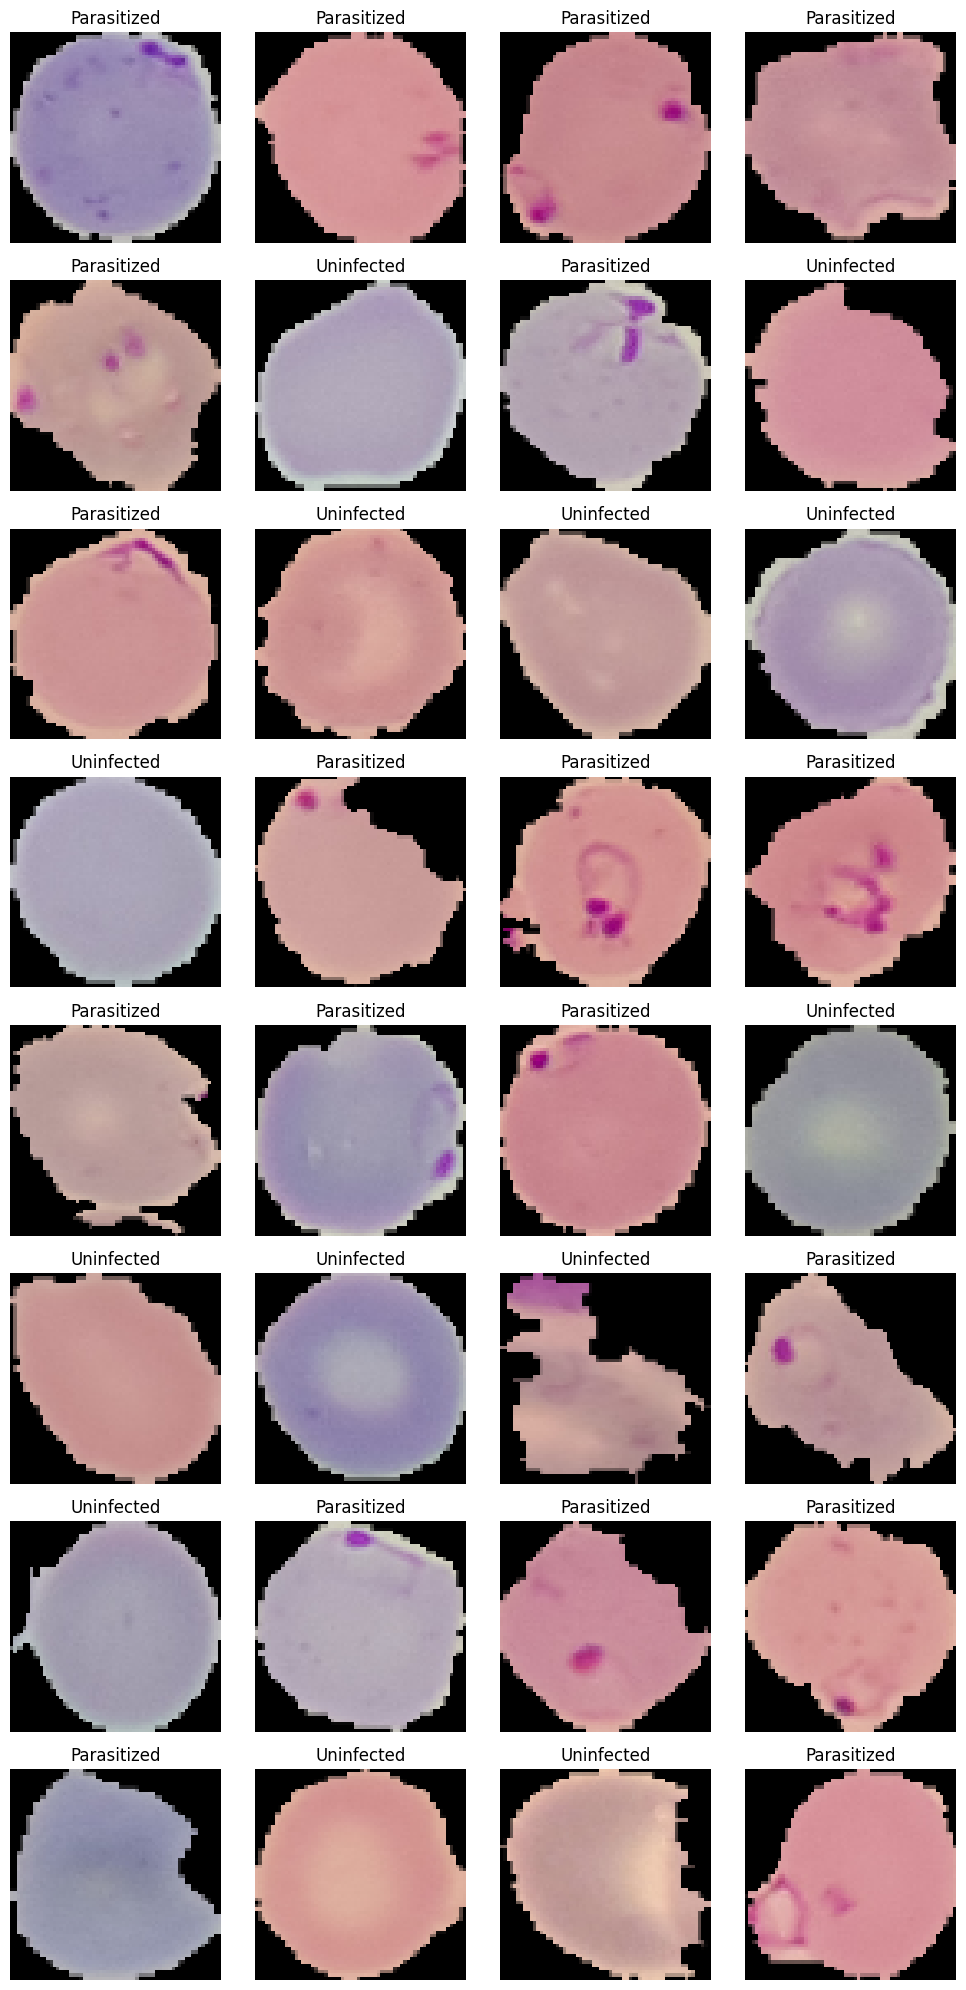

In [15]:
plt.figure(figsize=(10, 20))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

### Scale (normalize) the Data

---
**Create a function to normalize images:**

---

As noted earlier in the chapter, a pixel is represented by 256 values. So RGB channel values are in the [0, 255] range. Since neural networks work better with small values, _`data is typically normalized to be in the [0, 1] range`_.


In [16]:
def format_image(image, label):
  image = tf.image.resize(image, just_img) / 255.0
  return image, label

_`The function will be used when we configure the input pipeline.`_


## 4. Build the Consumable Input Pipeline

Use buffered prefetching to get data from disk to mitigate I/O issues. Cache data to keep images in memory after they’re loaded off disk. Caching saves operations like file opening and data reading from being executed during each epoch.

Shuffle the training set, and cache and prefetch train and test sets:



---
**Initialize parameters, shuffle training data, and batch and prefetch training and test data:**

---

`val_ds.map(format_image)`: Aplica la función `format_image` al conjunto de datos de prueba de manera similar a `train_ds`.

In [18]:
shuffle_size = 100

train_cds = train_ds.map(format_image).\
                        shuffle(shuffle_size).cache().prefetch(1)
val_cds = val_ds.map(format_image).\
                        cache().prefetch(1)
test_cds = test_ds.map(format_image).\
                        cache().prefetch(1)


---
**Inspect tensors (normalization)**

---


We will collect all the images into lists using append, then convert these lists into NumPy arrays.

Iterate over the datasets (`train_cds` and `val_cds`). Convert each image tensor to a NumPy array using `x.numpy()` and append it to the respective list.



In [19]:
import numpy as np

# Collect images into lists
train_images_list = []
val_images_list = []

# Append images to the lists
for x, _ in train_cds:
    train_images_list.append(x.numpy())

for x, _ in val_cds:
    val_images_list.append(x.numpy())

# Convert lists to NumPy arrays
train_images = np.concatenate(train_images_list, axis=0)
val_images = np.concatenate(val_images_list, axis=0)

# Find and print min and max values
print("Training dataset - min value:", train_images.min(), "max value:", train_images.max())
print("Test dataset - min value:", val_images.min(), "max value:", val_images.max())


Training dataset - min value: 0.0 max value: 1.0
Test dataset - min value: 0.0 max value: 1.0



>**Note** since training and test data have already been batched by the utility, do not batch when building the input pipeline!

### Build the Model
_`Since we are working with large color images, we need to build a convolutional neural network (CNN) model`_ to garner respectable performance because our images are color with higher pixel counts.


We need additional libraries for a CNN:



### What is a [CNN](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)?

A **`Convolutional Neural Network (CNN)`** is a type of deep learning algorithm specifically designed to process structured grid data, such as images. CNNs are particularly effective for tasks involving visual data, making them the go-to architecture for image recognition, classification, and computer vision applications.

![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp)

Fig. 1. _Simple Convolucional Neural Network (CNN). Source ([analyticsvidhya](https://www.analyticsvidhya.com/))_


### Key Components of a CNN
1. **`Input Layer`**:
    - **`Function`** This layer is designed to receive the raw data in its original or prepocesed form.
    - **`Output`** An image, usually represented as a 3D array (height, width, and color channels).

2. **`Convolutional Layers`**:
    - **`Function`**: These layers apply a set of filters (kernels) to the input data. Each filter slides (convolves) over the input image, computing dot products between the filter and the overlapping regions of the image.
    - **`Output`**: The result is a _`set of feature maps`_, which highlight various features of the input such as edges, textures, or patterns.
    
3. **`Activation Functions`**:
    - **`Function`**: After convolution, an activation function like [ReLU (Rectified Linear Unit)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) is applied to introduce non-linearity into the model. This helps the network to learn complex patterns.
    
4. **`Pooling Layers`**:
    - **`Function`**: Pooling layers _`reduce the spatial dimensions`_ (width and height) of the feature maps, which helps in reducing the computational load and controls overfitting.
    - **`Types`**: Common types of pooling include `max pooling` (which takes the maximum value in each region) and `average pooling` (which takes the average value).
    
5. **`Fully Connected Layers`**:
    - **`Function`**: These layers are typically _`placed at the end of the network and are used to make final predictions`_. They are fully connected in the sense that each neuron in one layer is connected to every neuron in the next layer.
    
6. **`Output (Softmax) Layer`**:
    - **`Function`**: In `classification tasks`, a softmax activation function is applied in the final layer to _`convert the network’s outputs into probability distributions over the class labels`_.



### How CNNs Work

1. **`Input Image`**:
    - The input to a CNN is typically an image represented as a multi-dimensional array (height, width, and channels).

2. **`Convolution and Pooling`**:
    - The image passes through a series of convolutional and pooling layers, which progressively extract higher-level features from the raw pixel values.

3. **`Flattening`**:
    - After several layers of convolutions and pooling, the output is flattened into a one-dimensional vector to be fed into the `fully connected` layers.

4. **`Classification`**:
    - The fully connected layers process the `flattened vector` and output the final `classification probabilities`.



### Benefits of CNNs

- **`Parameter Sharing`**: Convolutional layers share weights across the spatial dimensions, which _`reduces the number of parameters and computational complexity`_.
- **`Translation Invariance`**: By learning local patterns (features), _`CNNs can recognize objects regardless of their position in the image`_.
- **`Hierarchical Feature Learning`**: CNNs automatcally _`learn a hierarchy of features, from low-level features like edges to high-level features like object parts`_.



### Applications of CNNs

- **`Image Classification`**: _`Identifying the category to which an image belongs`_.
- **`Object Detection`**: _`Detecting and localizing objects within an image`_.
- **`Image Segmentation`**: _`Dividing an image into multiple segments or regions, often used in medical imaging`_.


Convolutional Neural Networks are a powerful class of neural networks that excel in handling image data. Their ability to learn hierarchical features and reduce the number of parameters through convolution and pooling operations makes them well-suited for various computer vision tasks. By leveraging these capabilities, _`CNNs have achieved state-of-the-art performance in many real-world applications`_.

---

**Import libraries**

---

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

---
**Get the number of classes for use in the model**

---

In [21]:
num_classes = len(class_names)
num_classes

2

---
**Create a multilayer CNN model**

---

- The `first layer` scales the data.
- The `second layer` contains 32 neurons with a 3 × 3 convolutional kernel (or filter). Activation is relu.
- The `third layer` uses maximum pooling to reduce the spatial size of a layer by just keeping the maximum values. As such,
the pooling layer reduces image dimensionality without losing important features or patterns. The next four layers repeat the same pattern as the second and third layers.
- The `Flatten layer` converts pooled data into a single column because a Dense layer expects data in this form.
- The `final Dense layer` enables classification and prediction.


In [22]:
cell_model = Sequential([
  Input(shape=cell_shape),  # Input volume: (batch_size, 64, 64, 3)

  Conv2D(32, 3, activation='relu'),  # Output volume: (batch_size, 62, 62, 32) -> (64 - 3 + 1) = 62
  MaxPooling2D(),                    # Output volume: (batch_size, 31, 31, 32) -> (62 / 2) = 31

  Conv2D(32, 3, activation='relu'),  # Output volume: (batch_size, 29, 29, 32) -> (31 - 3 + 1) = 29
  MaxPooling2D(),                    # Output volume: (batch_size, 14, 14, 32) -> (29 / 2) = 14

  Conv2D(32, 3, activation='relu'),  # Output volume: (batch_size, 12, 12, 32) -> (14 - 3 + 1) = 12
  MaxPooling2D(),                    # Output volume: (batch_size, 6, 6, 32) -> (12 / 2) = 6

  Flatten(),                         # Output volume: (batch_size, 6 * 6 * 32) = (batch_size, 1152)

  Dense(128, activation='relu'),     # Output volume: (batch_size, 128)

  Dense(num_classes, activation='softmax')  # Output volume: (batch_size, num_classes)
])


## 5. Compile and Train the Model
---
Compile and Train the Model with `SparseCategoricalCrossentropy()`:

---

In [23]:
cell_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])


1. **`cell_model.compile()`**:
   - This method configures the model for training. It specifies the optimizer, the loss function, and the metrics to monitor during training and evaluation.

2. **`optimizer='adam'`**:
   - **Optimizer**: The optimizer is a _`key component`_ in training a neural network. It updates the model's weights based on the computed gradients.
   - **Adam Optimizer**: _`Adam (short for Adaptive Moment Estimation)`_ is a popular optimizer that _`combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp`_. It is efficient, has low memory requirements, and works well for a wide range of problems.
   - **Why Adam**: Adam is often used because it _`adjusts the learning rate for each parameter dynamically`_, leading to faster convergence and better performance.

3. **`loss=tf.losses.SparseCategoricalCrossentropy()`**:
   - **Loss Function**: The loss function is _`used to measure how well the model's predictions match the true labels`_. During training, the model tries to minimize this loss.
   - **Sparse Categorical Crossentropy**: This is a specific type of _`loss function used for classification tasks where the target labels are integers`_.
     - **Categorical Crossentropy**: This loss function is used when you have multiple classes. _`It measures the difference between the predicted probability distribution and the true distribution (one-hot encoded)`_.
      - *`One-hot encoding`* transforms a categorical variable (with integer or string labels) into a binary vector. _`Each position in the vector corresponds to one possible category, and only the position corresponding to the category of the data point is set to 1`_, while all other positions are set to 0.
     - **Sparse**: The "sparse" version is used when your labels are integers instead of one-hot encoded vectors. For example, if you have three classes, your labels might be `[0, 1, 2]` instead of `[[1,0,0], [0,1,0], [0,0,1]]`.
   - **Why Sparse Categorical Crossentropy**: It is computationally efficient when dealing with a large number of classes because it _`avoids the need to convert integer labels to one-hot encoded labels`_. It is especially useful when you have a large dataset with many classes.

4. **`metrics=['accuracy']`**:
   - **Metrics**: _`Metrics are used to evaluate the performance of the model`_. They do not affect the training process but provide insights into how well the model is doing.
   - **Accuracy**: Accuracy is a common metric for classification tasks. It _`measures the percentage of correct predictions`_ out of the total predictions made.
   - **Why Accuracy**: It is a simple and _`intuitive measure of performance`_, making it easy to understand how well the model is performing on the training and validation datasets.

This setup is commonly used in classification problems, particularly when dealing with image data in CNNs, to ensure that the model is trained effectively and evaluated properly.

---
**Show the model architecture**

---

In [24]:
# Print the model summary
cell_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,234 (653.26 KB)

 Trainable params: 167,234 (653.26 KB)

 Non-trainable params: 0 (0.00 B)

Since softmax is applied to outputs, we **don’t** set from_logits=True. Train the model:

---
**Train the model:** This may take a few minutes.

---

In [ ]:
history = cell_model.fit(
    train_cds,
    validation_data=val_cds,
    epochs=30)


Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 112s 159ms/step - accuracy: 0.7292 - loss: 0.4912 - val_accuracy: 0.9441 - val_loss: 0.1582
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 101s 147ms/step - accuracy: 0.9542 - loss: 0.1476 - val_accuracy: 0.9526 - val_loss: 0.1435
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 103s 149ms/step - accuracy: 0.9593 - loss: 0.1292 - val_accuracy: 0.9532 - val_loss: 0.1389
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 103s 149ms/step - accuracy: 0.9615 - loss: 0.1161 - val_accuracy: 0.9537 - val_loss: 0.1351
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 140s 146ms/step - accuracy: 0.9628 - loss: 0.1053 - val_accuracy: 0.9545 - val_loss: 0.1307
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 100s 145ms/step - accuracy: 0.9667 - loss: 0.0960 - val_accuracy: 0.9559 - val_loss: 0.1383
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 146s 151ms/step - accuracy: 0.9697 - loss: 0.0845 - val_accuracy: 0.9546 - val_loss: 0.1441
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.9729 -

---

**Plots metrics**

---

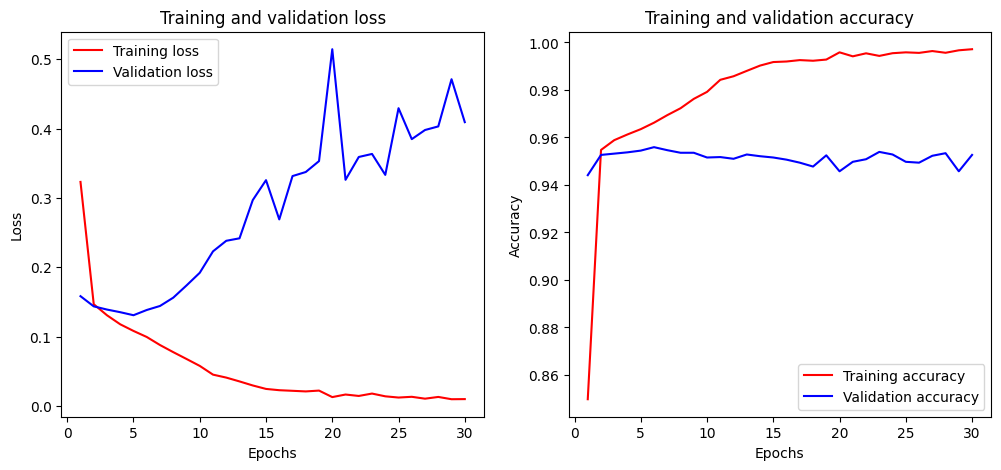

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 6. Evaluate the Model (Inference)



### Importance of Evaluating Metrics on a Separate Test Set

When training a machine learning model, it's crucial to assess _`its performance not just on the training data but on a separate test set`_. The primary metrics of interest, such as accuracy and loss, should be evaluated on this test set for several important reasons:

1. **`Avoiding Overfitting`**:
   - **`Training Performance`**: During training, the model learns patterns from the training data. If evaluated solely on this data, _`the metrics might be misleadingly high, especially if the model overfits by memorizing the training data rather than generalizing from it`_.
   - **`Overfitting`**: Overfitting occurs when a _`model learns the training data too well, including its noise and outliers, leading to poor performance on new, unseen data`_.

2. **`Generalization Ability`**:
   - **`Test Set`**: The test set consists of _`data the model has never seen during training`_. Evaluating performance on the test set gives a better indication of how well the model generalizes to new, unseen data.
   - **`Real-World Performance`**: _`This is crucial for understanding how the model will perform in real-world scenarios`_ where it encounters data outside the training set.

3. **`Reliable Performance Metrics`**:
   - **`Accuracy and Loss`**: _`These metrics are more reliable and meaningful when calculated on the test set`_. They provide a true estimate of the model’s predictive power and help in comparing different models or tuning hyperparameters.
   - **`Preventing Bias`**: Evaluating on the training set can lead to biased results, as _`the model has already been exposed to this data and adjusted its parameters to fit it as closely as possible`_.

4. **`Model Validation`**:
   - **`Validation Process`**: During the model development process, _`it’s common to split the data into training, validation, and test sets`_. _`The validation set is used for tuning the model and preventing overfitting, while the test set is reserved for the final evaluation`_.
   - **`Final Check`**: _`Metrics from the test set act as a final check before deploying the model`_. They help ensure that the model is robust and ready for practical use.



---
**Evaluate**

---

Test Loss: 0.4091821312904358
Test Accuracy: 0.952640175819397


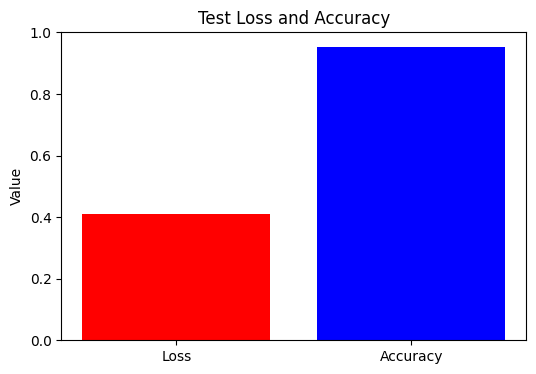

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = cell_model.evaluate(test_cds, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()

---

Obtain Confusion Matrix

---

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step
Length of y_true: 5511
Length of y_pred_classes: 5511


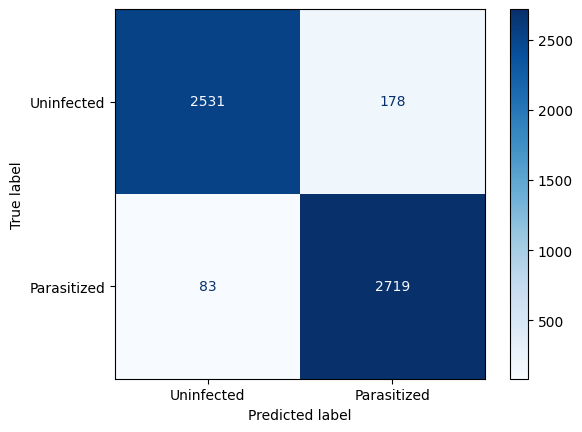

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions (predict labels) on the test set
y_pred = cell_model.predict(test_cds)
y_pred_classes = np.argmax(y_pred, axis=1)


# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_cds], axis=0)

print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Uninfected', 'Parasitized'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## `NOTEBOOK PRACTICE 5`

---
Modify this notebook as necessary to improve the performance of the model you create You are allowed to increase the number of layers, use a different loss function, and change the optimizer to another different to Adam. You can also increase the number of epochs to 50.

---
Remember these general steps (can be modified/add as you need):

1. Load the dataset and preprocess it as necessary.
2. Build a neural network model, making modifications as mentioned below.
3. Compile the model with a suitable loss function and the optimizer (Adam?).
4. Train the model with 50 epochs (no more).
5. Evaluate the model on the test set and print the test loss and accuracy.
6. Plot the test loss and accuracy.
7. Compute and visualize the confusion matrix to analyze the model's performance.
8. Create a ROC curve and analize the result obtained.

**Dataset**: you can use this dataset (malaria) or colorectal_histology (bonus and optative).

### Instructions to Improve the Notebook (study and work about it by yourself):

ChatGPT can be your great allied. Use it for your convenence.

1. **Model Architecture**:
   - Experiment with different architectures, such as adding more layers (i.e., batch normalization) or changing the number of neurons in each layer.
2. **Regularization**:
   - Consider using dropout, L1/L2 regularization to prevent overfitting.
3. **Hyperparameter Tuning**:
   - Choose a suitable loss function depending on the task (e.g., categorical cross-entropy for classification).
   - Experiment with different optimizers for efficient optimization.
4. **Training**
   - Monitor the training progress using validation data to avoid overfitting.
   - Visualize the model's performance using appropriate plots and metrics.

Feel free to modify and adapt you NB as needed to suit your learning objectives and preferences. Happy coding!